In [58]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
# Task 1: Register and obtain an API key from OpenWeatherMap.
api_key = "a9222bff6f6447067f6bfc41ebea85f9"
lat = 18.184135
lon = 74.610764

In [60]:
# Task 2: Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.
  # Replace with your desired city
url = f"http://api.openweathermap.org/data/2.5/forecast?q=Pune&appid={api_key}"

In [61]:
response = requests.get(url)



In [52]:
if response.status_code == 200:
    weather_data = response.json()
else:
    print("Failed to retrieve weather data. Check your API key and city name.")

In [62]:
# Task 3: Extract relevant weather attributes from the API response.
weather_list = weather_data["list"]
weather_attributes = [data["main"] for data in weather_list]


In [63]:
# Task 4: Clean and preprocess the retrieved data.
weather_df = pd.DataFrame(weather_attributes)
weather_df["dt"] = pd.to_datetime([data["dt"] for data in weather_list], unit="s")
weather_df.set_index("dt", inplace=True)


In [64]:
# Task 5: Perform data modeling to analyze weather patterns.
average_temperature = weather_df["temp"].mean()
max_temperature = weather_df["temp"].max()
min_temperature = weather_df["temp"].min()


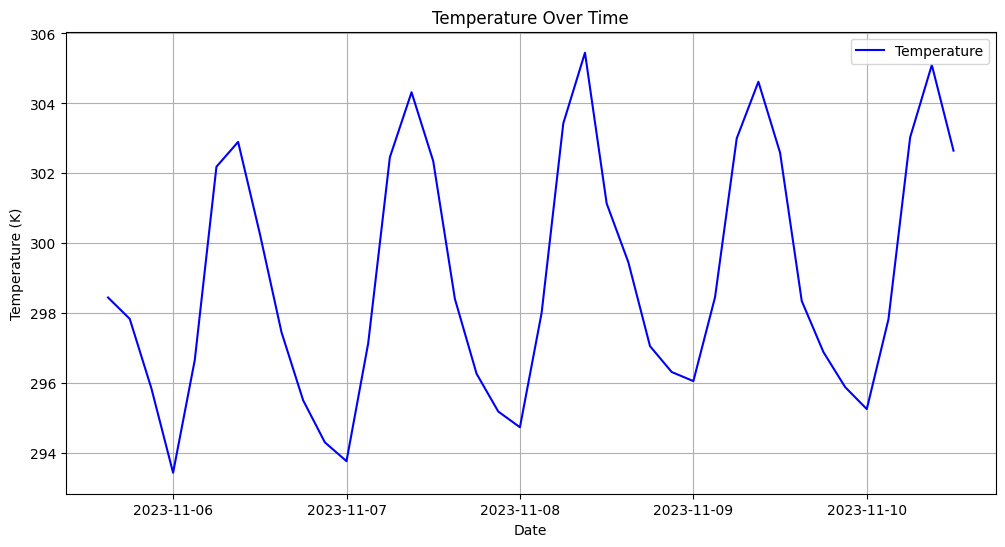

In [65]:
# Task 6: Visualize the weather data.
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df["temp"], label="Temperature", color="blue")
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid()
plt.show()

In [66]:
# Task 7: Apply data aggregation techniques to summarize weather statistics by specific time periods.
daily_weather = weather_df.resample("D").mean()
monthly_weather = weather_df.resample("M").mean()
seasonal_weather = weather_df.resample("Q").mean()


# print('Daily weather: ')
# print(daily_weather)
# print('Monthly weather: ')
# print(monthly_weather)
# print('seasonal_weather: ')
# print(seasonal_weather)

In [68]:
# Note: Geographical data is not available in the OpenWeatherMap API response.

!pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import folium

# Define the latitude and longitude coordinates for your city
city_coordinates = {"DYPIEMR": (18.6460542, 73.7573666)}  # Example coordinates for New York

# Replace "YOUR_CITY" with the name of the city you want to visualize
city_name = "DYPIEMR"

# Create a map centered around the city
m = folium.Map(location=city_coordinates[city_name], zoom_start=10)

# Add a marker for the city
folium.Marker(city_coordinates[city_name], tooltip=city_name).add_to(m)

# Display the map
m.save('city_map.html')  # Save the map to an HTML file

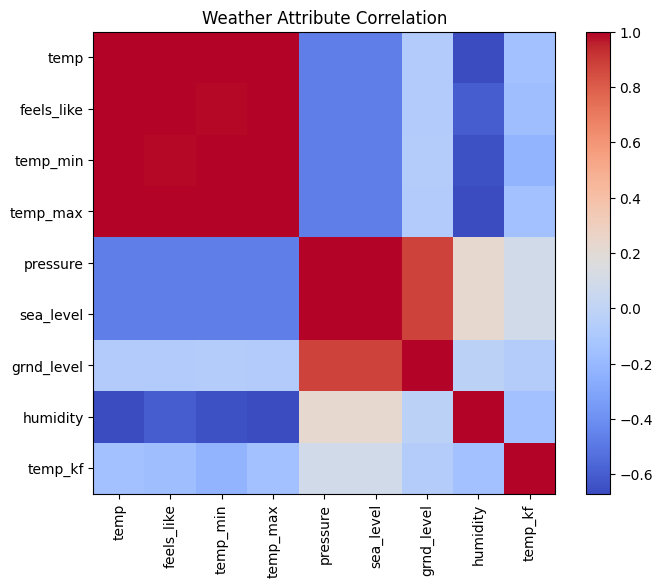

In [67]:
# Task 9: Explore and visualize relationships between weather attributes.
correlation_matrix = weather_df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Weather Attribute Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()